# data analysis of breast cancer:

In [80]:
import pandas as pd 
import numpy as np



In [81]:
#load Dataframe
df=pd.read_csv('breastCancer.csv')


replacing all "?"'s with negative value:


In [82]:
df.replace('?',-99999,inplace=True)
df=df.astype(float)


Removing usless data :(id)


In [83]:
df.drop("id",1,inplace=True)

retrieve dataframe informations:

In [84]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,-2285.497854,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,14966.322789,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,-99999.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [85]:
df.shape

(699, 10)

In [86]:
df.isnull().sum()


clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness      699 non-null float64
size_uniformity      699 non-null float64
shape_uniformity     699 non-null float64
marginal_adhesion    699 non-null float64
epithelial_size      699 non-null float64
bare_nucleoli        699 non-null float64
bland_chromatin      699 non-null float64
normal_nucleoli      699 non-null float64
mitoses              699 non-null float64
class                699 non-null float64
dtypes: float64(10)
memory usage: 54.7 KB


Separate inputs/Outputs (features,labels):


In [88]:
X = df.drop(columns=["class"]) #input
y = df['class'] #output

Split Data:

In [89]:
from sklearn.model_selection import train_test_split

#use 20% data for testing and 60% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)#for knn

# Training:

### Using Knn:

In [90]:
from sklearn.neighbors import KNeighborsClassifier

#train our model
clf=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
#measure accuracy
accuracy=clf.score(X_test,y_test)
print("the accuracy score is :",accuracy)
print("\n\n")

the accuracy score is : 0.9642857142857143





## Use Cross validation with Knn: 

In [92]:
from sklearn.model_selection import cross_val_score

clf=KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')#no need to split data 
print("average accuracy",scores.mean())

average accuracy 0.9685300207039338


Text(0, 0.5, 'Cross-Validated Accuracy')

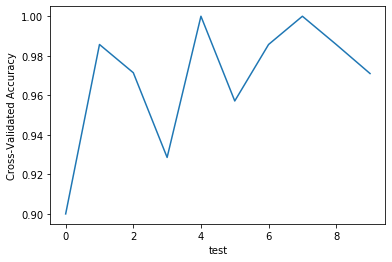

In [93]:
import matplotlib.pyplot as plt
plt.plot(range(10), scores)
plt.xlabel('test')
plt.ylabel('Cross-Validated Accuracy')

## GridSearchCv with Knn:

! GridSearchCv is a CrossValidation repeat n time with variant params for knn.

In [94]:
from sklearn.model_selection import GridSearchCV


In [95]:
k_range = list(range(1, 31)) #K_neighbors range
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid,
                    cv=10, scoring='accuracy',
                    return_train_score=False)
#fit data
grid.fit(X, y)
print("the average of scores is:",grid.cv_results_['mean_test_score'].mean())

the average of scores is: 0.9633278122843342


In [96]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.955694,0.042580,{'n_neighbors': 1}
1,0.942836,0.036116,{'n_neighbors': 2}
2,0.962816,0.030761,{'n_neighbors': 3}
3,0.965694,0.029402,{'n_neighbors': 4}
4,0.968530,0.030502,{'n_neighbors': 5}


Text(0, 0.5, 'Cross-Validated Accuracy')

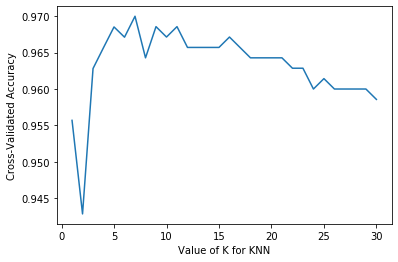

In [97]:
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

###### the best model:

In [98]:

print("best score is:",grid.best_score_)
print("with params:",grid.best_params_)
print("and the estimator:",grid.best_estimator_)

best score is: 0.97
with params: {'n_neighbors': 7}
and the estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


###### Using GridSearchCV with large params:

In [99]:
#k_range(1->30)
param_grid = dict(n_neighbors=k_range,
                 metric=["manhattan","euclidean"],
                 weights=['uniform', 'distance'])

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid,
                    cv=10, scoring='accuracy',
                    return_train_score=False)
#fit data
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [100]:
#Results:
print("\n\n")
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.965694,0.026480,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei..."
1,0.965694,0.026480,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei..."
2,0.942836,0.031916,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei..."
3,0.958551,0.029570,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei..."
4,0.964286,0.033350,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei..."
...,...,...,...
115,0.961429,0.030673,"{'metric': 'euclidean', 'n_neighbors': 28, 'we..."
116,0.960000,0.032451,"{'metric': 'euclidean', 'n_neighbors': 29, 'we..."
117,0.961429,0.030673,"{'metric': 'euclidean', 'n_neighbors': 29, 'we..."
118,0.958571,0.035254,"{'metric': 'euclidean', 'n_neighbors': 30, 'we..."


In [101]:
print("best score is:",grid.best_score_)
print("with params:",grid.best_params_)
print("and the estimator:",grid.best_estimator_)
print("\n\n")

best score is: 0.97
with params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
and the estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')





### example with the best estimator:


In [102]:
MAP = lambda t: "benign" if(t==2)else "malignant" # (2 for benign, 4 for malignant)


example=np.array([2,2,2,7,7,5,7,7,1])
example=example.reshape(1,-1) 

pred=grid.best_estimator_.predict(example)

pred=np.array([MAP(xi) for xi in pred]) 
pred[0]

'benign'